## python implimentation 

In [1]:
# Business Case:-To predict whether a person will have diabetes or not.

In [2]:
#import all libraris

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
## reading the data
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Domain analysis
#EDA and get insights from data

In [5]:
# get the statistical information of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# Data preprocessing

In [7]:
#cheking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

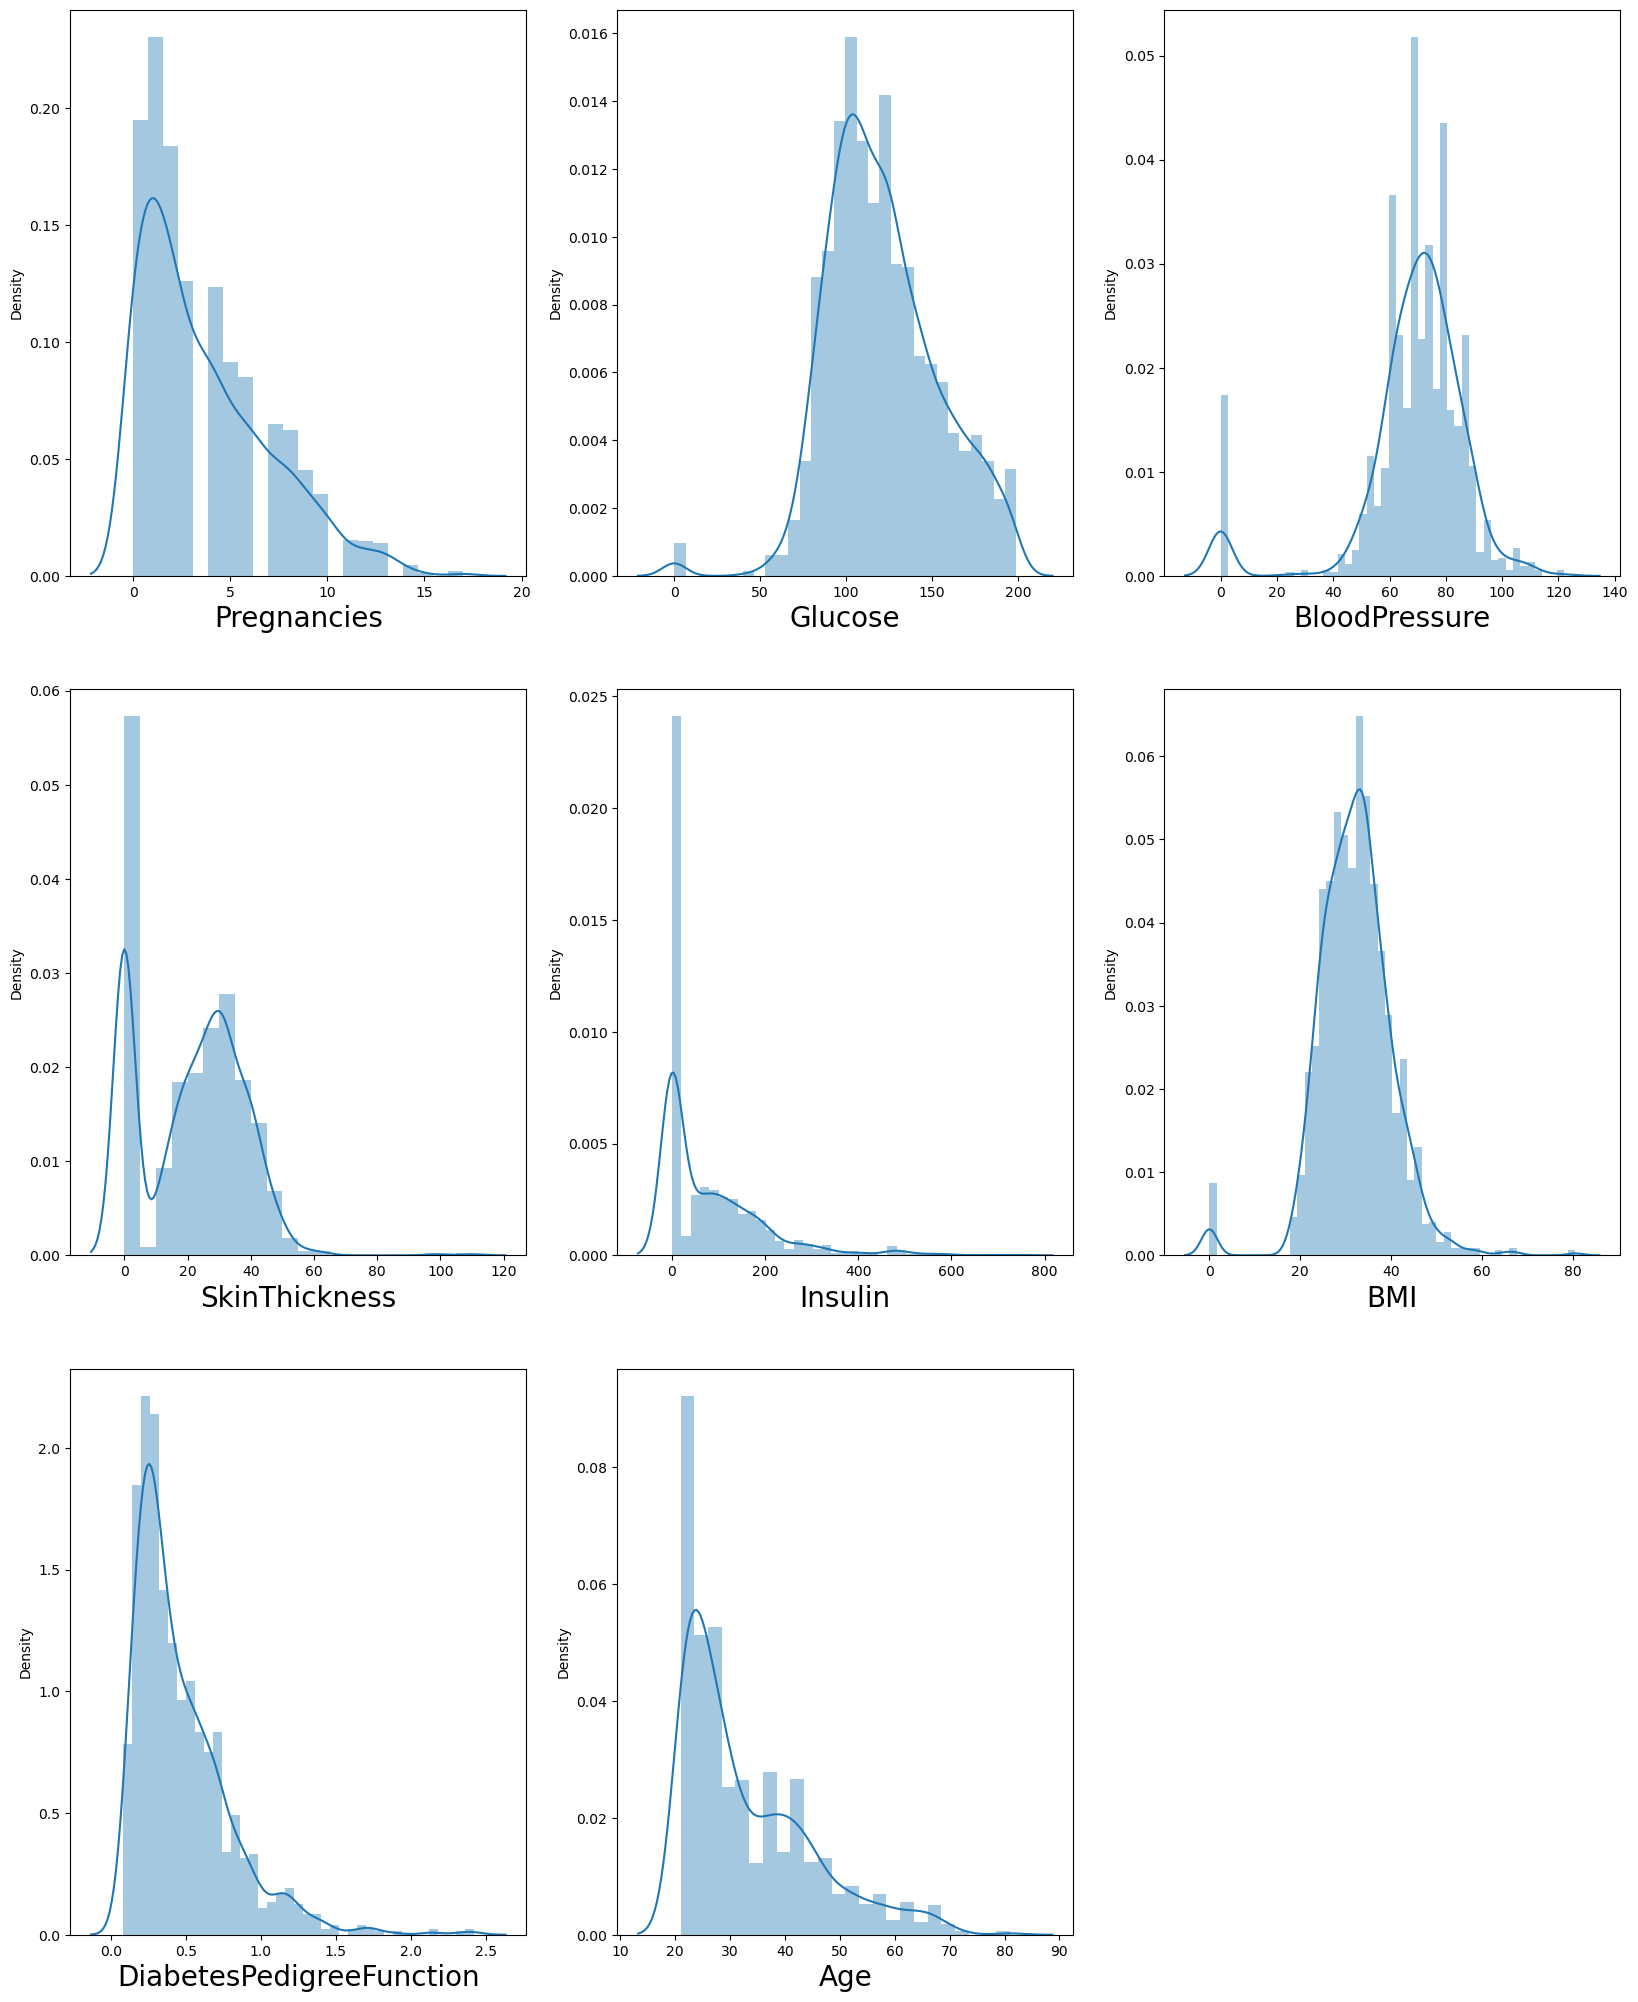

In [8]:
# let us see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<9: #as there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel("salary",fontsize)
    plotnumber+=1
plt.show()

In [9]:
c=0
for i in np.where(data['BloodPressure']==0):
    print(i)
# len(np.where(data['BMI']==0))

[   2   12   49   60   78   81  172  193  222  261  266  269  300  332
  336  347  357  426  430  435  453  468  484  494  522  533  535  589
  601  604  619  643  697  703  706  770  802  806  817  827  896  900
  905  923  938  954  964  990  992 1046 1058 1061 1076 1100 1154 1160
 1163 1227 1330 1351 1380 1419 1424 1427 1485 1489 1494 1512 1527 1543
 1553 1568 1576 1591 1600 1610 1679 1683 1689 1692 1707 1731 1785 1791
 1794 1870 1881 1899 1902 1993]


In [10]:
#replace zero values with the mean of the column
data["BMI"]=data["BMI"].replace(0,data["BMI"].median())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].median())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].median())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].median())

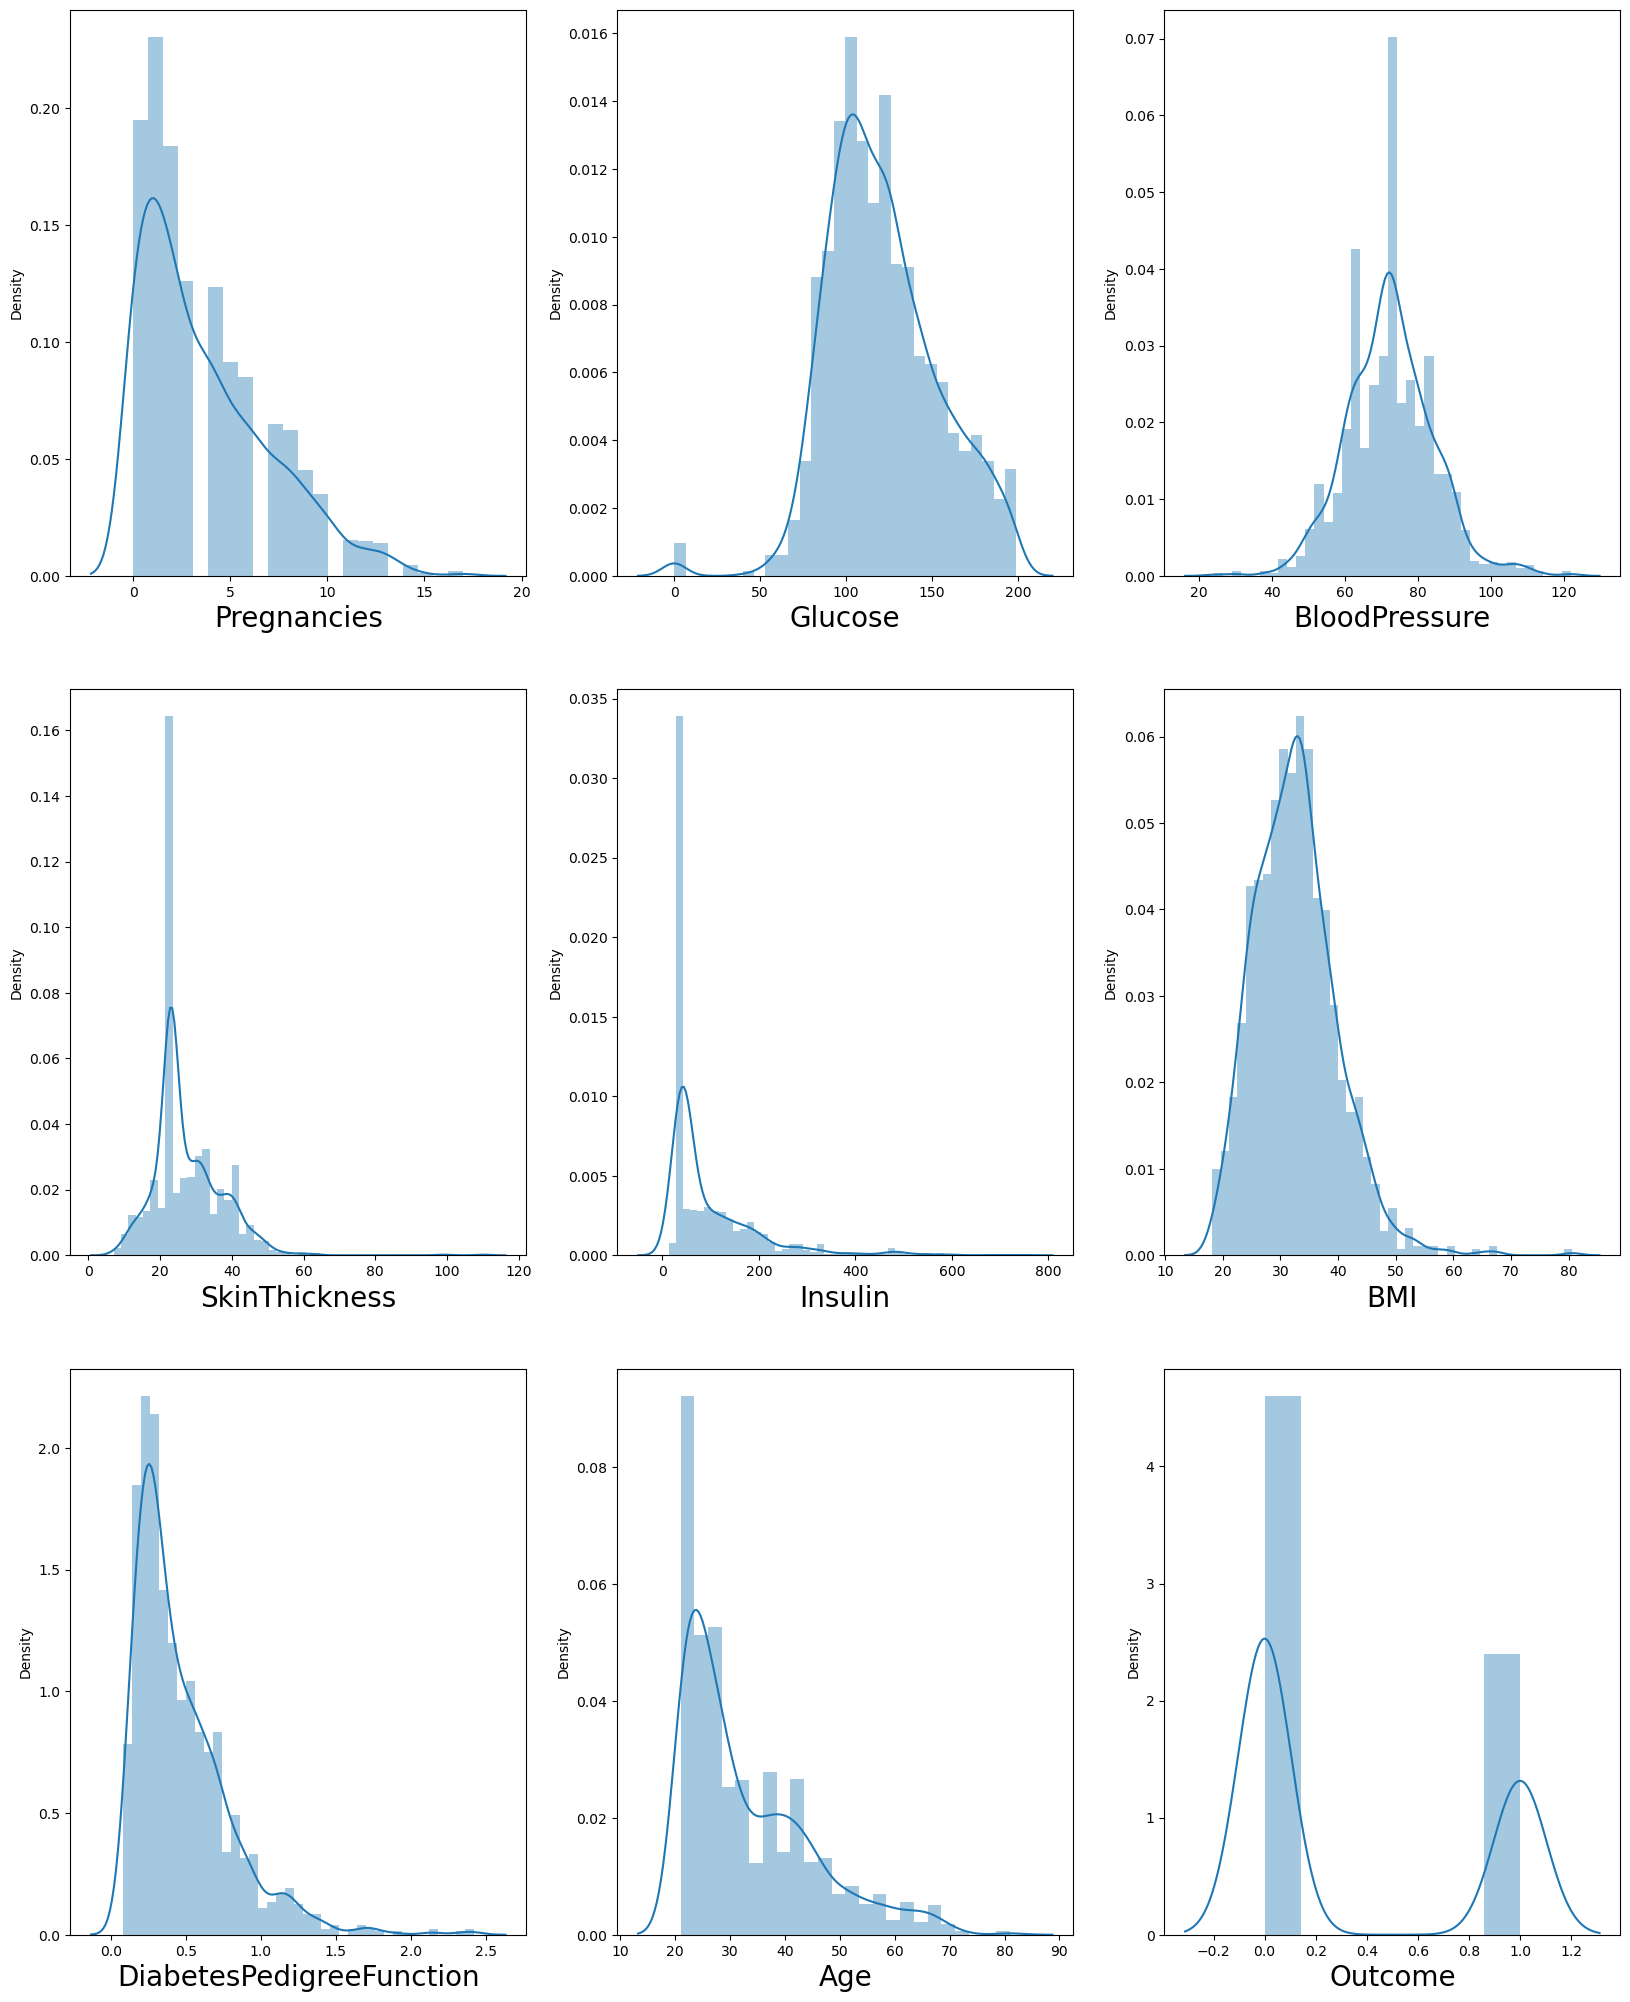

In [11]:
# lest us see how data is distributed for every coluumn
plt.figure(figsize=(20,25),  facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Model creation

In [12]:
## split x and y
x=data.drop(columns=["Outcome"])#Independant variables
y=data["Outcome"]# Dependent or target variable

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,40,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,72,23,40,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,23,40,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [14]:
##scaling the data
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [15]:
#y

In [16]:
x_scaled

array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [17]:
## splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [18]:
## taking optimal k to determine how many nearest neighbors to create
## create a list to store the error values for each k
error_rate=[]

# will take some time 
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [19]:
error_rate

[0.036, 0.118, 0.158, 0.188, 0.186, 0.202, 0.188, 0.216, 0.192, 0.204]

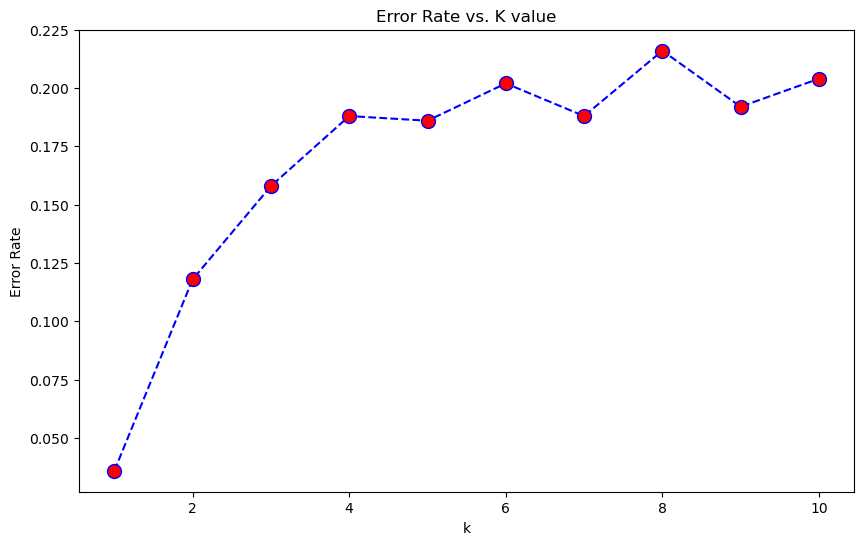

In [20]:
# lets plot the k_value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs. K value")
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [21]:
# let's fit the data into knn model and see how well it performs:
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
# predict
y_pred=knn1.predict(x_test)

In [23]:
##checking Accuracy score
print("The accuracy score is :",accuracy_score(y_test,y_pred))

The accuracy score is : 0.814


In [24]:
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_pred=knn1.predict(x_test)

In [26]:
print("The accuracy score is :",accuracy_score(y_test,y_pred))

The accuracy score is : 0.812


In [27]:
knn1=KNeighborsClassifier(n_neighbors=9)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [28]:
y_pred=knn1.predict(x_test)

In [29]:
print("The accuracy score is :",accuracy_score(y_test,y_pred))

The accuracy score is : 0.808


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       320
           1       0.78      0.64      0.71       180

    accuracy                           0.81       500
   macro avg       0.80      0.77      0.78       500
weighted avg       0.81      0.81      0.80       500



In [31]:
recall=recall_score(y_test,y_pred)
recall

0.6444444444444445

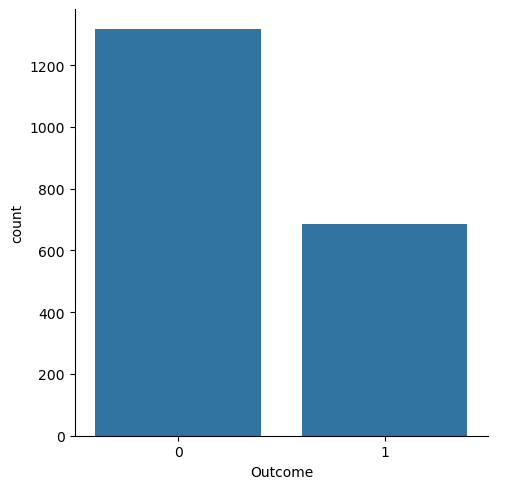

In [32]:
## cheking the balance of target
sns.catplot(x='Outcome',data=data,kind='count') #Imbalanced dataset

In [33]:
data.Outcome.value_counts() #inbalance data

Outcome
0    1316
1     684
Name: count, dtype: int64

In [34]:
#Apply SMOTE to balance
from imblearn.over_sampling import SMOTE  #balancing method smote
smote=SMOTE() ## object creation

In [35]:
y_train.value_counts()

Outcome
0    996
1    504
Name: count, dtype: int64

In [36]:
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

In [37]:
y=np.array(y_train_smote)

In [38]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [39]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [40]:
# predict the output for x_test
y_pred=knn2.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       320
           1       0.71      0.88      0.79       180

    accuracy                           0.83       500
   macro avg       0.82      0.84      0.82       500
weighted avg       0.85      0.83      0.83       500



In [42]:
recall=recall_score(y_test,y_pred)
recall

0.8833333333333333

In [43]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64